In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_medical_data.csv to synthetic_medical_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("synthetic_medical_data.csv")  # datamız
df.head()

,Age,Age_in_Diagnosis,Gender,Follow_Up_Duration_Month,Disease_Duration_Month,Preop_Tm_Size_MAX_mm,Kav_INV,Preop_GH,Sparse_GR,Preop_Hypopituitarism_Binary,...,Preop_INV,Last_Treatment_DOST,Macro_Micro,Comb_therapy,Last_IGF1,Tiroid_ca,Kolon_ca,MALIGNANCY_OTHER_COMBINED,Pituitary_Adenoma,Dead
0,60.457284,26.064144,0,21.069885,168.840051,17.698645,0.0,20.801887,0,YOK,...,1.0,0.0,NaN,0,516.992255,0,0,NO_MALIGNANCY,Macroadenoma,0
1,52.202564,19.655357,0,67.278860,56.909049,30.303121,0.0,18.759584,0,YOK,...,1.0,1.0,Microadenoma,0,247.924293,0,0,NO_MALIGNANCY,Macroadenoma,0
2,62.419951,58.952532,1,58.583124,245.786261,4.745002,NaN,15.470987,0,NaN,...,1.0,0.0,NaN,0,232.651155,0,0,NO_MALIGNANCY,Macroadenoma,0
3,73.799388,48.852388,0,127.389974,121.230738,8.670370,0.0,1.458926,0,YOK,...,1.0,0.0,NaN,1,347.418438,0,0,NO_MALIGNANCY,Macroadenoma,1
4,50.956006,40.332984,1,16.886720,90.890337,15.551001,0.0,11.106907,0,YOK,...,1.0,0.0,Macroadenoma,1,20.000000,1,0,THYROID,Macroadenoma,0


In [ ]:
#null değer içeren kolon oranı
missing = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
missing.head(15)

,0
Preop_GH,30.81
Kav_INV,22.24
Preop_INV,21.09
Preop_Tm_Size_MAX_mm,20.10
Pituitary_Adenoma,19.44
Age_at_Operation,18.62
Macro_Micro,17.96
Preop_Hypopituitarism_Binary,13.18
Preop_Hypopituitarism_Detalied,13.18
Last_Upper_Limit_of_Normal,12.03


In [ ]:
# Kaç satır, kaç sütun?
df.shape


(607, 52)

In [ ]:
# Sütun tipleri
df.dtypes.value_counts()

,count
int64,25
float64,15
object,12


In [ ]:
df["Dead"].value_counts()
df["Dead"].value_counts(normalize=True)

,proportion
Dead,
0,0.91598
1,0.08402


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Target & Features ayır
target = "Dead"
X = df.drop(columns=[target])
y = df[target]

# Train-test split (stratified önemli, çünkü veri dengesiz)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()


((485, 51),
 (122, 51),
 Dead
 0    444
 1     41
 Name: count, dtype: int64,
 Dead
 0    112
 1     10
 Name: count, dtype: int64)

In [ ]:
# Sayısal sütunlar
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Kategorik sütunlar
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

numeric_features, len(numeric_features), categorical_features, len(categorical_features)


(['Age',
  'Age_in_Diagnosis',
  'Gender',
  'Follow_Up_Duration_Month',
  'Disease_Duration_Month',
  'Preop_Tm_Size_MAX_mm',
  'Kav_INV',
  'Preop_GH',
  'Sparse_GR',
  'Last_GH',
  'Last_Upper_Limit_of_Normal',
  'RT',
  'Colon_polyp',
  'GIS_cancer',
  'Lung_cancer',
  'Hematologic_cancer',
  'Breast_ca',
  'Urogenital_cancer',
  'ANY_MALIGNANCY',
  'DM',
  'HT',
  'OSAS',
  'Dislipidemi',
  'Congestive_Heart_Failure',
  'Coronary_Artery_Disease',
  'Cerebrovascular_Accident',
  'Cardiovascular_Disease',
  'Postop_SLAR_Usage',
  'Postop_Dost_Usage',
  'Pegvisomant_Usage',
  'Repeat_TSS',
  'Age_at_Operation',
  'Number_of_Operations',
  'Preop_INV',
  'Last_Treatment_DOST',
  'Comb_therapy',
  'Last_IGF1',
  'Tiroid_ca',
  'Kolon_ca'],
 39,
 ['Preop_Hypopituitarism_Binary',
  'Preop_Hypopituitarism_Detalied',
  'Postop_Hypopituitarism_Binary',
  'Postop_Hypopituitarism_Detailed',
  'Remission_3_Month',
  'Preop_Medication_Usage',
  'Last_Status',
  'SLAR_resistance',
  'TSS_VAR_YOK

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
numeric_features = [
    'Age', 'Age_in_Diagnosis', 'Gender', 'Follow_Up_Duration_Month',
    'Disease_Duration_Month', 'Preop_Tm_Size_MAX_mm', 'Kav_INV', 'Preop_GH',
    'Sparse_GR', 'Last_GH', 'Last_Upper_Limit_of_Normal', 'RT', 'Colon_polyp',
    'GIS_cancer', 'Lung_cancer', 'Hematologic_cancer', 'Breast_ca',
    'Urogenital_cancer', 'ANY_MALIGNANCY', 'DM', 'HT', 'OSAS', 'Dislipidemi',
    'Congestive_Heart_Failure', 'Coronary_Artery_Disease',
    'Cerebrovascular_Accident', 'Cardiovascular_Disease', 'Postop_SLAR_Usage',
    'Postop_Dost_Usage', 'Pegvisomant_Usage', 'Repeat_TSS',
    'Age_at_Operation', 'Number_of_Operations', 'Preop_INV',
    'Last_Treatment_DOST', 'Comb_therapy', 'Last_IGF1', 'Tiroid_ca', 'Kolon_ca'
]

categorical_features = [
    'Preop_Hypopituitarism_Binary', 'Preop_Hypopituitarism_Detalied',
    'Postop_Hypopituitarism_Binary', 'Postop_Hypopituitarism_Detailed',
    'Remission_3_Month', 'Preop_Medication_Usage', 'Last_Status',
    'SLAR_resistance', 'TSS_VAR_YOK', 'Macro_Micro',
    'MALIGNANCY_OTHER_COMBINED', 'Pituitary_Adenoma'
]


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),      # Eksik değer → median
    ("scaler", StandardScaler())                         # Standardizasyon
])


In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),    # Eksik kategori → en sık olan
    ("onehot", OneHotEncoder(handle_unknown="ignore"))       # Bütün kategorileri kodla
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# ================== PATHLER ==================
# Burayı kendi dosya adına göre değiştir:
INPUT_PATH = "synthetic_medical_data.csv"   # veya "veri.xlsx"
OUTPUT_PATH = "cleaned_data.csv"

# Eğer dosyan Excel ise:
# df = pd.read_excel(INPUT_PATH)
# CSV ise:
df = pd.read_csv(INPUT_PATH)

# ================== FEATURE LİSTELERİ ==================
numeric_features = [
    'Age', 'Age_in_Diagnosis', 'Gender', 'Follow_Up_Duration_Month',
    'Disease_Duration_Month', 'Preop_Tm_Size_MAX_mm', 'Kav_INV', 'Preop_GH',
    'Sparse_GR', 'Last_GH', 'Last_Upper_Limit_of_Normal', 'RT', 'Colon_polyp',
    'GIS_cancer', 'Lung_cancer', 'Hematologic_cancer', 'Breast_ca',
    'Urogenital_cancer', 'ANY_MALIGNANCY', 'DM', 'HT', 'OSAS', 'Dislipidemi',
    'Congestive_Heart_Failure', 'Coronary_Artery_Disease',
    'Cerebrovascular_Accident', 'Cardiovascular_Disease', 'Postop_SLAR_Usage',
    'Postop_Dost_Usage', 'Pegvisomant_Usage', 'Repeat_TSS',
    'Age_at_Operation', 'Number_of_Operations', 'Preop_INV',
    'Last_Treatment_DOST', 'Comb_therapy', 'Last_IGF1', 'Tiroid_ca', 'Kolon_ca'
]

categorical_features = [
    'Preop_Hypopituitarism_Binary', 'Preop_Hypopituitarism_Detalied',
    'Postop_Hypopituitarism_Binary', 'Postop_Hypopituitarism_Detailed',
    'Remission_3_Month', 'Preop_Medication_Usage', 'Last_Status',
    'SLAR_resistance', 'TSS_VAR_YOK', 'Macro_Micro',
    'MALIGNANCY_OTHER_COMBINED', 'Pituitary_Adenoma'
]

# Sadece modelde kullanacağımız kolonları alalım
feature_cols = numeric_features + categorical_features
X = df[feature_cols].copy()

# ================== PIPELINE TANIMLARI ==================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),      # Eksik değer → median
    ("scaler", StandardScaler())                        # Standardizasyon
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),              # Eksik kategori → en sık olan
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    # !!! ÖNEMLİ: sparse_output=False → dense array, toarray() ihtiyacı yok
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"   # Diğer kolonları at
)

# ================== FIT + TRANSFORM ==================
# X_processed: numpy array (dense)
X_processed = preprocessor.fit_transform(X)

# OneHotEncoder objesini al
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]

# OneHot ile oluşan yeni kategorik sütun isimleri
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Final sütun isimleri: önce sayısallar, sonra OHE sütunları
final_columns = numeric_features + list(ohe_feature_names)

# !!!! DİKKAT: toarray() YOK !!!!
X_clean_df = pd.DataFrame(X_processed, columns=final_columns)

# İster sadece X'i kaydedebilirsin:
X_clean_df.to_csv(OUTPUT_PATH, index=False)

print(f"Temizlenmiş veri '{OUTPUT_PATH}' dosyasına kaydedildi.")
print(X_clean_df.head())


Temizlenmiş veri 'cleaned_data.csv' dosyasına kaydedildi.
        Age  Age_in_Diagnosis    Gender  Follow_Up_Duration_Month  \
0  0.521280         -1.343615 -0.833985                 -1.136989   
1 -0.135906         -1.884219 -0.833985                 -0.464420   
2  0.677535          1.430639  1.199063                 -0.590986   
3  1.583491          0.578655 -0.833985                  0.410493   
4 -0.235149         -0.139987  1.199063                 -1.197874   

   Disease_Duration_Month  Preop_Tm_Size_MAX_mm   Kav_INV  Preop_GH  \
0                0.075729              0.051188 -0.767467  0.273238   
1               -1.134421              1.381050 -0.767467  0.079921   
2                0.907639             -1.315515 -0.767467 -0.231364   
3               -0.439002             -0.901360 -0.767467 -1.557689   
4               -0.767030             -0.175404 -0.767467 -0.644450   

   Sparse_GR   Last_GH  ...  Macro_Micro_Microadenoma  \
0  -0.462601  0.426779  ...                

In [ ]:
from google.colab import files
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#kendimiz görelim diye kodda yok.
# Preprocessing pipeline'ı train set üzerinde çalıştırıyoruz
X_train_processed = preprocessor.fit_transform(X_train)

# Ortaya çıkan array'in boyutuna bakalım
X_train_processed.shape


(485, 80)

In [ ]:
#kendimiz görelim diye kodda yok.

import pandas as pd

# OneHot için yeni sütun isimlerini alma
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Sayısal + kategorik final sütun isimlerini birleştirme
final_columns = numeric_features + list(ohe_feature_names)

# !!!! DİKKAT: toarray() YOK !!!!
X_train_clean_df = pd.DataFrame(X_train_processed, columns=final_columns)

X_train_clean_df.head()


,Age,Age_in_Diagnosis,Gender,Follow_Up_Duration_Month,Disease_Duration_Month,Preop_Tm_Size_MAX_mm,Kav_INV,Preop_GH,Sparse_GR,Last_GH,...,Macro_Micro_Microadenoma,MALIGNANCY_OTHER_COMBINED_BREAST_CA,MALIGNANCY_OTHER_COMBINED_GIS,MALIGNANCY_OTHER_COMBINED_HEMATOLOGIC,MALIGNANCY_OTHER_COMBINED_LUNG,MALIGNANCY_OTHER_COMBINED_NO_MALIGNANCY,MALIGNANCY_OTHER_COMBINED_THYROID,MALIGNANCY_OTHER_COMBINED_UROGENITAL,Pituitary_Adenoma_Macroadenoma,Pituitary_Adenoma_Microadenoma
0,0.794051,-0.772786,-0.841277,-0.109824,-0.948307,-0.192651,-0.775023,-0.138882,-0.470810,-0.736086,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.640773,-1.240113,1.188670,-0.054913,-0.954097,-0.323181,-0.775023,0.084828,2.123997,-0.485825,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.409494,0.515958,1.188670,0.993117,-1.066936,-0.192651,1.290285,-0.168853,2.123997,-0.882337,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.434893,-0.186087,1.188670,-0.205281,-0.211713,-0.846429,1.290285,-0.924540,-0.470810,-1.031798,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.726786,-0.374737,1.188670,1.289834,0.425370,-1.415650,1.290285,-0.287380,-0.470810,-0.814531,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
##kendimiz görelim diye kodda yok.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])


In [ ]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Logistic Regression Pipeline
log_reg_model = Pipeline(steps=[

    # 1) Preprocessing aşaması
    ("preprocess", preprocessor),

    # 2) Model aşaması
    ("model", LogisticRegression(
        max_iter=1000,           # Modelin daha uzun öğrenmesini sağlar
        class_weight="balanced", # İmbalanced dataset için performansı artırır
        solver="lbfgs",          # Küçük–orta boy datalar için stabil çözücü
        random_state=42
    ))
])

log_reg_model.fit(X_train, y_train)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score, confusion_matrix
)

# Tahminler
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.6557377049180327
Precision: 0.029411764705882353
Recall: 0.1
F1: 0.045454545454545456
ROC-AUC: 0.41875000000000007
PR-AUC: 0.0737054171487799

Confusion Matrix:
 [[79 33]
 [ 9  1]]


In [ ]:
#LOGISTIC REGRESSION with Threshhold Tuning
import numpy as np

thresholds = np.arange(0.05, 0.95, 0.05)

for t in thresholds:
    preds = (y_pred_proba >= t).astype(int)
    print(f"Threshold {t:.2f} → Recall: {recall_score(y_test, preds):.3f}, Precision: {precision_score(y_test, preds):.3f}, F1: {f1_score(y_test, preds):.3f}")


Threshold 0.05 → Recall: 0.600, Precision: 0.067, F1: 0.121
Threshold 0.10 → Recall: 0.600, Precision: 0.080, F1: 0.141
Threshold 0.15 → Recall: 0.500, Precision: 0.077, F1: 0.133
Threshold 0.20 → Recall: 0.400, Precision: 0.074, F1: 0.125
Threshold 0.25 → Recall: 0.300, Precision: 0.059, F1: 0.098
Threshold 0.30 → Recall: 0.300, Precision: 0.061, F1: 0.102
Threshold 0.35 → Recall: 0.300, Precision: 0.068, F1: 0.111
Threshold 0.40 → Recall: 0.200, Precision: 0.051, F1: 0.082
Threshold 0.45 → Recall: 0.200, Precision: 0.054, F1: 0.085
Threshold 0.50 → Recall: 0.100, Precision: 0.029, F1: 0.045
Threshold 0.55 → Recall: 0.100, Precision: 0.032, F1: 0.049
Threshold 0.60 → Recall: 0.100, Precision: 0.037, F1: 0.054
Threshold 0.65 → Recall: 0.100, Precision: 0.042, F1: 0.059
Threshold 0.70 → Recall: 0.100, Precision: 0.043, F1: 0.061
Threshold 0.75 → Recall: 0.000, Precision: 0.000, F1: 0.000
Threshold 0.80 → Recall: 0.000, Precision: 0.000, F1: 0.000
Threshold 0.85 → Recall: 0.000, Precisio

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score
)
import numpy as np

# 0.10 eşiği için tahminler
threshold = 0.10
y_pred_thr_010 = (y_pred_proba >= threshold).astype(int)

print(f"=== LOGISTIC REGRESSION (threshold = {threshold}) ===\n")

print("Accuracy:", accuracy_score(y_test, y_pred_thr_010))
print("Precision:", precision_score(y_test, y_pred_thr_010, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_thr_010))
print("F1:", f1_score(y_test, y_pred_thr_010))

# ROC-AUC ve PR-AUC threshold'a bağlı değil, olasılık skoruna göre hesaplanır
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_thr_010))

print("MCC:", matthews_corrcoef(y_test, y_pred_thr_010))

=== LOGISTIC REGRESSION (threshold = 0.1) ===

Accuracy: 0.4016393442622951
Precision: 0.08
Recall: 0.6
F1: 0.1411764705882353
ROC-AUC: 0.41875000000000007
PR-AUC: 0.0737054171487799

Confusion Matrix:
[[43 69]
 [ 4  6]]
MCC: -0.009059076625181612


In [ ]:
#RANDOM FOREST


from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,      # Ağaç sayısı (100 yerine 300 daha stabil)
        max_depth=None,        # Ağaçlar derinleşebilsin
        min_samples_split=10,  # Overfitting azaltır
        min_samples_leaf=5,    # Küçük grupları engeller
        class_weight="balanced",  # Imbalanced veriye özel
        random_state=42,
        n_jobs=-1               # Daha hızlı çalışır
    ))
])

#Modeli eğitelim
rf_model.fit(X_train, y_train)


#Test seti üzerinde tahminleri alalım
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

#Performans metriklerini alalım

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score,
    confusion_matrix
)

print("=== RANDOM FOREST RESULTS ===\n")

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



=== RANDOM FOREST RESULTS ===

Accuracy: 0.9180327868852459
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5044642857142858
PR-AUC: 0.09947901934360118

Confusion Matrix:
 [[112   0]
 [ 10   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# RANDOM FOREST + Threshhold . Threshold nerede ilk Precisionını veriyor

import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

thresholds = np.arange(0.01, 0.5, 0.05)

for t in thresholds:
    preds = (y_pred_proba_rf >= t).astype(int)
    print(f"Threshold {t:.2f} → Recall: {recall_score(y_test, preds):.3f}, "
          f"Precision: {precision_score(y_test, preds, zero_division=0):.3f}, "
          f"F1: {f1_score(y_test, preds, zero_division=0):.3f}")


Threshold 0.01 → Recall: 1.000, Precision: 0.082, F1: 0.152
Threshold 0.06 → Recall: 1.000, Precision: 0.083, F1: 0.153
Threshold 0.11 → Recall: 0.900, Precision: 0.078, F1: 0.144
Threshold 0.16 → Recall: 0.900, Precision: 0.089, F1: 0.162
Threshold 0.21 → Recall: 0.600, Precision: 0.100, F1: 0.171
Threshold 0.26 → Recall: 0.200, Precision: 0.059, F1: 0.091
Threshold 0.31 → Recall: 0.100, Precision: 0.077, F1: 0.087
Threshold 0.36 → Recall: 0.100, Precision: 0.167, F1: 0.125
Threshold 0.41 → Recall: 0.000, Precision: 0.000, F1: 0.000
Threshold 0.46 → Recall: 0.000, Precision: 0.000, F1: 0.000


In [ ]:
#en iyi thresholdu 0.21 de gördük ve şimdide 0.21 için sonuçları alıyoruz

best_threshold = 0.21
y_pred_rf_best = (y_pred_proba_rf >= best_threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1:", f1_score(y_test, y_pred_rf_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))


Accuracy: 0.5245901639344263
Precision: 0.1
Recall: 0.6
F1: 0.17142857142857143

Confusion Matrix:
 [[58 54]
 [ 4  6]]


====== RANDOM FOREST FINAL RESULTS (Threshold = 0.21) ======

Accuracy: 0.5245901639344263
Precision: 0.1
Recall: 0.6
F1-Score: 0.17142857142857143

ROC-AUC: 0.5044642857142858
PR-AUC: 0.09947901934360118
MCC (Matthews Correlation Coefficient): 0.0646685986377437

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.94      0.52      0.67       112
           1       0.10      0.60      0.17        10

    accuracy                           0.52       122
   macro avg       0.52      0.56      0.42       122
weighted avg       0.87      0.52      0.63       122

Confusion Matrix:
 [[58 54]
 [ 4  6]]


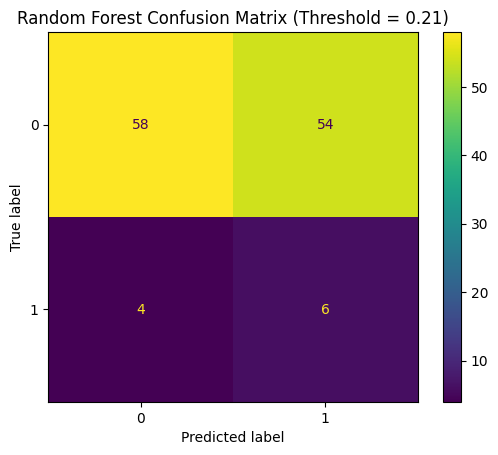

In [ ]:
#RANDOMFOREST + THRESHHOLD TUM METRICLERIN OLDUGU HALI
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    classification_report,
    matthews_corrcoef,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Seçtiğimiz en iyi threshold
best_threshold = 0.21

# Yeni tahminler (threshold uygulanmış)
y_pred_rf_best = (y_pred_proba_rf >= best_threshold).astype(int)

print("====== RANDOM FOREST FINAL RESULTS (Threshold = 0.21) ======\n")

# Temel Metrikler
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1-Score:", f1_score(y_test, y_pred_rf_best))

# ROC ve PR AUC (threshold'tan bağımsız)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
pr_auc = average_precision_score(y_test, y_pred_proba_rf)
print("\nROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# MCC
mcc = matthews_corrcoef(y_test, y_pred_rf_best)
print("MCC (Matthews Correlation Coefficient):", mcc)

# Classification Report
print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_pred_rf_best))

# Confusion Matrix - Sayısal
cm = confusion_matrix(y_test, y_pred_rf_best)
print("Confusion Matrix:\n", cm)

# Confusion Matrix - Görsel
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest Confusion Matrix (Threshold = 0.21)")
plt.show()

# Eğer istersen kaydetmek için:
# plt.savefig("rf_confusion_matrix.png")


In [ ]:
#RANDOM FOREST + SMOTE başlıyor.
from collections import Counter
print("Before SMOTE:", Counter(y_train))

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote_rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),   # senin kurduğun yapı
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])

smote_rf_pipeline.fit(X_train, y_train)


Before SMOTE: Counter({0: 444, 1: 41})


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Age_in_Diagnosis',
                                                   'Gender',
                                                   'Follow_Up_Duration_Month',
                                                   'Disease_Duration_Month',
                                                   'Preop_Tm_Size_MAX_mm',
                                                   'Kav_INV', 'Preop_GH',
                                                   'Sparse_GR', 'Last_GH',
                                                   'Last_Upper_Limit_of_Normal',
                                                   'RT', 'Co...
                                                   'Postop_Hypopituitarism_Binary',
                                                   'Postop_Hypopituitarism_Detailed',
                                                   'Remission_3_Month',
                                                   'Preop_Medication_Usage',
                                                   'Last_Status',
                                                   'SLAR_resistance',
                                                   'TSS_VAR_YOK', 'Macro_Micro',
                                                   'MALIGNANCY_OTHER_COMBINED',
                                                   'Pituitary_Adenoma'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# RANDOM FOREST'da SMOTE'dan sonra (aşağıdaki koddan sonra yani)444 e 444 yaşayan ve ölü saple oldu. 403 tane ekledi.
from collections import Counter

# SMOTE sonrası y_train dağılımını çekiyoruz
y_smote = smote_rf_pipeline.named_steps["smote"].fit_resample(
    preprocessor.fit_transform(X_train), y_train
)[1]

print("After SMOTE:", Counter(y_smote))
print("Synthetic samples added:", Counter(y_smote)[1] - Counter(y_train)[1])


After SMOTE: Counter({0: 444, 1: 444})
Synthetic samples added: 403


In [ ]:
#en iyi threshhold değişcek şimdi çünkü train set değişti
y_pred_smote = smote_rf_pipeline.predict(X_test)
y_pred_proba_smote = smote_rf_pipeline.predict_proba(X_test)[:,1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1:", f1_score(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_smote))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Accuracy: 0.9180327868852459
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5249999999999999
PR-AUC: 0.09382334031350867

Confusion Matrix:
 [[112   0]
 [ 10   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

#“Model ayırt etme gücü sınırlı olsa da (roc-auc=0.52), uygun threshold seçimi ile klinik açıdan anlamlı hale getirilmiştir.threshold=0.21 için iyi”
# smote olunca  73-39, 5-5. smotesuz 0.21 threshhold için 58-54,4-6 idi. yani performansı arttırdı.
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    matthews_corrcoef, confusion_matrix
)

thresholds = np.arange(0.01, 0.51, 0.05)

print("THRESH\tACC\tPREC\tRECL\tF1\tROC-AUC\tPR-AUC\tMCC\tCM")
for t in thresholds:
    preds = (y_pred_proba_smote >= t).astype(int)

    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec  = recall_score(y_test, preds)
    f1   = f1_score(y_test, preds, zero_division=0)

    roc  = roc_auc_score(y_test, y_pred_proba_smote)      # threshold'tan bağımsız
    pr   = average_precision_score(y_test, y_pred_proba_smote)  # threshold'tan bağımsız
    mcc  = matthews_corrcoef(y_test, preds)

    cm = confusion_matrix(y_test, preds)

    print(f"{t:0.2f}\t{acc:0.3f}\t{prec:0.3f}\t{rec:0.3f}\t{f1:0.3f}\t"
          f"{roc:0.3f}\t{pr:0.3f}\t{mcc:0.3f}\t{cm.tolist()}")


THRESH	ACC	PREC	RECL	F1	ROC-AUC	PR-AUC	MCC	CM
0.01	0.082	0.082	1.000	0.152	0.525	0.094	0.000	[[0, 112], [0, 10]]
0.06	0.123	0.085	1.000	0.157	0.525	0.094	0.062	[[5, 107], [0, 10]]
0.11	0.221	0.087	0.900	0.159	0.525	0.094	0.046	[[18, 94], [1, 9]]
0.16	0.393	0.079	0.600	0.140	0.525	0.094	-0.014	[[42, 70], [4, 6]]
0.21	0.639	0.114	0.500	0.185	0.525	0.094	0.087	[[73, 39], [5, 5]]
0.26	0.738	0.077	0.200	0.111	0.525	0.094	-0.010	[[88, 24], [8, 2]]
0.31	0.820	0.000	0.000	0.000	0.525	0.094	-0.099	[[100, 12], [10, 0]]
0.36	0.869	0.000	0.000	0.000	0.525	0.094	-0.068	[[106, 6], [10, 0]]
0.41	0.902	0.000	0.000	0.000	0.525	0.094	-0.039	[[110, 2], [10, 0]]
0.46	0.910	0.000	0.000	0.000	0.525	0.094	-0.027	[[111, 1], [10, 0]]


In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 19.9 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size

In [ ]:
# ===============================================================
#  EBM (Explainable Boosting Machine) - Tek Hücrelik Full Blok
#  - Model kurulumu + eğitim
#  - Temel metrikler (threshold=0.5)
#  - Farklı threshold analiz tablosu
#  - İstenilen threshold için detaylı çıktı fonksiyonu
#  - Global feature importance + interaction tabloları
#  - Tek bir örnek için local explanation
# ===============================================================

# Eğer interpret yüklü değilse, önce bir kere şu satırı ayrı bir hücrede çalıştır:
# !pip install interpret

import numpy as np
import pandas as pd

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

# ---------------------------------------------------------------
# 1) Sayısal ve kategorik kolonları ayırma
#    (X_train/X_test zaten notebook'ta tanımlı olmalı)
# ---------------------------------------------------------------
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object", "bool", "category"]).columns

# Sayısal kolonlara dokunma (passthrough), kategorikleri OneHotEncode et
numeric_transformer = "passthrough"
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

# ---------------------------------------------------------------
# 2) EBM modelini tanımlama
#    - interactions: etkileşim sayısı
#    - learning_rate: öğrenme hızı
#    - max_bins, max_leaves: model karmaşıklığı ayarları
# ---------------------------------------------------------------
ebm_model = ExplainableBoostingClassifier(
    interactions=10,
    learning_rate=0.01,
    max_bins=256,
    max_leaves=3,
    random_state=42
)

# Pipeline: önce preprocess, sonra EBM modeli
ebm_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", ebm_model),
    ]
)

# ---------------------------------------------------------------
# 3) Modeli eğitme
# ---------------------------------------------------------------
ebm_pipeline.fit(X_train, y_train)

# ---------------------------------------------------------------
# 4) Test seti üzerinde tahminler (varsayılan threshold=0.5)
# ---------------------------------------------------------------
y_pred_ebm = ebm_pipeline.predict(X_test)  # 0/1 sınıf tahmini (threshold=0.5)
y_pred_proba_ebm = ebm_pipeline.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılığı

print("=== EBM SONUÇLARI (Threshold = 0.5) ===\n")
print("Accuracy :", accuracy_score(y_test, y_pred_ebm))
print("Precision:", precision_score(y_test, y_pred_ebm, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ebm))
print("F1       :", f1_score(y_test, y_pred_ebm))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_proba_ebm))
print("PR-AUC   :", average_precision_score(y_test, y_pred_proba_ebm))

cm_default = confusion_matrix(y_test, y_pred_ebm)
print("\nConfusion Matrix (0.5 threshold):\n", cm_default)

# ---------------------------------------------------------------
# 5) Farklı threshold değerleri için metrik tablosu
#    Hangi eşiğin senin için daha anlamlı olduğunu buradan görürsün
# ---------------------------------------------------------------
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

results = []

for thr in thresholds:
    # Olasılığı verilen eşiğe göre 0/1'e çevir
    y_pred_thr = (y_pred_proba_ebm >= thr).astype(int)

    acc  = accuracy_score(y_test, y_pred_thr)
    prec = precision_score(y_test, y_pred_thr, zero_division=0)
    rec  = recall_score(y_test, y_pred_thr)
    f1   = f1_score(y_test, y_pred_thr)
    cm   = confusion_matrix(y_test, y_pred_thr)
    tn, fp, fn, tp = cm.ravel()

    results.append({
        "threshold": thr,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

ebm_threshold_df = pd.DataFrame(results)

print("\n=== EBM Threshold Analizi ===")
print(ebm_threshold_df)

# ---------------------------------------------------------------
# 6) İstediğin threshold için hızlı analiz fonksiyonu
#    evaluate_ebm_with_threshold(0.4) gibi çağırabilirsin
# ---------------------------------------------------------------
def evaluate_ebm_with_threshold(threshold):
    """
    Verilen threshold için Accuracy, Precision, Recall, F1 ve Confusion Matrix yazdırır.
    """
    y_pred_thr = (y_pred_proba_ebm >= threshold).astype(int)

    acc  = accuracy_score(y_test, y_pred_thr)
    prec = precision_score(y_test, y_pred_thr, zero_division=0)
    rec  = recall_score(y_test, y_pred_thr)
    f1   = f1_score(y_test, y_pred_thr)
    cm   = confusion_matrix(y_test, y_pred_thr)

    print(f"\n=== EBM | Threshold = {threshold} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1       :", f1)
    print("\nConfusion Matrix:\n", cm)

# Örnek kullanım (istersen değiştir, istersen yorum satırına al)
evaluate_ebm_with_threshold(0.4)

# ---------------------------------------------------------------
# 7) Global Feature Importance (Tüm veri genelinde değişken önemi)
#    - Hangi değişken modelde daha önemli, skorlarıyla beraber görürsün
# ---------------------------------------------------------------
ebm_global = ebm_pipeline.named_steps["model"].explain_global()

# Interaktif arayüz (Notebook/Colab'da yeni bir pencerede açılır)
print("\nGlobal explanation interaktif arayüzü için: show(ebm_global) çağrılıyor...")
show(ebm_global)

# Önem skorlarını tablo halinde görmek istersen:
feature_importances = pd.DataFrame({
    "feature": ebm_global.data()["names"],
    "importance": ebm_global.data()["scores"]
})

feature_importances = feature_importances.sort_values("importance", ascending=False)
print("\n=== En Önemli 20 Feature (Global Importance) ===")
print(feature_importances.head(20))

# ---------------------------------------------------------------
# 8) Feature Interaction Strengths
#    - Hangi feature çiftleri birlikte önemli, etkileşim skorlarıyla
# ---------------------------------------------------------------
interaction_scores = ebm_global.data().get("interaction_scores", [])
interaction_names = ebm_global.data().get("interaction_names", [])

if interaction_scores and interaction_names:
    interaction_df = pd.DataFrame({
        "Interactions": interaction_names,
        "Strength": interaction_scores
    }).sort_values("Strength", ascending=False)

    print("\n=== En Güçlü 10 Interaction ===")
    print(interaction_df.head(10))
else:
    print("\nBu modelde interaction bilgisi bulunamadı (interactions parametresi düşük olabilir).")

# ---------------------------------------------------------------
# 9) Local Explanation (Tek bir örnek için karar açıklaması)
#    - Örneğin test setindeki ilk hastanın model kararı nasıl oluşmuş?
# ---------------------------------------------------------------
sample_index = 0  # İstersen burayı değiştirerek farklı hastaları inceleyebilirsin
x_instance = X_test.iloc[[sample_index]]

# Preprocess sonrası tek örnek
x_instance_transformed = ebm_pipeline.named_steps["preprocess"].transform(x_instance)

# Local explanation (tek örnek)
ebm_local = ebm_pipeline.named_steps["model"].explain_local(
    x_instance_transformed,
    y_pred_proba_ebm[sample_index:sample_index+1]
)

print(f"\nLocal explanation interaktif arayüzü için: show(ebm_local) çağrılıyor... (örnek index: {sample_index})")
show(ebm_local)



/usr/local/lib/python3.12/dist-packages/interpret/glassbox/_ebm/_ebm.py:872: UserWarning: Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]
  warn(


=== EBM SONUÇLARI (Threshold = 0.5) ===

Accuracy : 0.9180327868852459
Precision: 0.0
Recall   : 0.0
F1       : 0.0
ROC-AUC  : 0.4375
PR-AUC   : 0.09050541188141309

Confusion Matrix (0.5 threshold):
 [[112   0]
 [ 10   0]]

=== EBM Threshold Analizi ===
   threshold  accuracy  precision  recall   f1   TN  FP  FN  TP
0        0.2  0.885246        0.0     0.0  0.0  108   4  10   0
1        0.3  0.909836        0.0     0.0  0.0  111   1  10   0
2        0.4  0.918033        0.0     0.0  0.0  112   0  10   0
3        0.5  0.918033        0.0     0.0  0.0  112   0  10   0
4        0.6  0.918033        0.0     0.0  0.0  112   0  10   0
5        0.7  0.918033        0.0     0.0  0.0  112   0  10   0

=== EBM | Threshold = 0.4 ===
Accuracy : 0.9180327868852459
Precision: 0.0
Recall   : 0.0
F1       : 0.0

Confusion Matrix:
 [[112   0]
 [ 10   0]]

Global explanation interaktif arayüzü için: show(ebm_global) çağrılıyor...



=== En Önemli 20 Feature (Global Importance) ===
                        feature  importance
91  feature_0004 & feature_0036    0.156363
87  feature_0000 & feature_0003    0.145768
93  feature_0020 & feature_0031    0.099882
89  feature_0003 & feature_0031    0.092296
92  feature_0009 & feature_0031    0.065147
90  feature_0004 & feature_0031    0.061251
95  feature_0031 & feature_0071    0.053052
88  feature_0001 & feature_0031    0.051722
94  feature_0031 & feature_0069    0.045559
96  feature_0065 & feature_0071    0.039383
20                 feature_0020    0.036923
57                 feature_0057    0.029537
27                 feature_0027    0.027079
76                 feature_0076    0.025205
71                 feature_0071    0.024526
35                 feature_0035    0.024492
74                 feature_0074    0.023876
2                  feature_0002    0.023211
6                  feature_0006    0.022483
28                 feature_0028    0.021405

Bu modelde interaction bi